In [1716]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [1717]:
results_df = pd.read_csv('auction_detailed_log.csv')
print(results_df.columns)

Index(['ItemNumber', 'ItemTime', 'BidAmount', 'Patience'], dtype='object')


In [1718]:
results_df

,ItemNumber,ItemTime,BidAmount,Patience
0,1,15.2,139.06,NaN
1,1,25.5,140.45,NaN
2,1,36.2,141.85,NaN
3,1,36.3,143.27,NaN
4,1,43.9,144.71,NaN
...,...,...,...,...
33248,1000,117.1,96.81,NaN
33249,1000,117.7,97.78,NaN
33250,1000,118.0,98.76,NaN
33251,1000,119.5,99.75,NaN


In [1719]:
# Calculate the average number of bids
aggregated_items = results_df.groupby('ItemNumber').size().reset_index(name='count')

normalizer = len(aggregated_items)
print('normalizer:', normalizer)

aggregated_items

normalizer: 1000


,ItemNumber,count
0,1,53
1,2,41
2,3,28
3,4,33
4,5,18
...,...,...
995,996,34
996,997,46
997,998,35
998,999,43


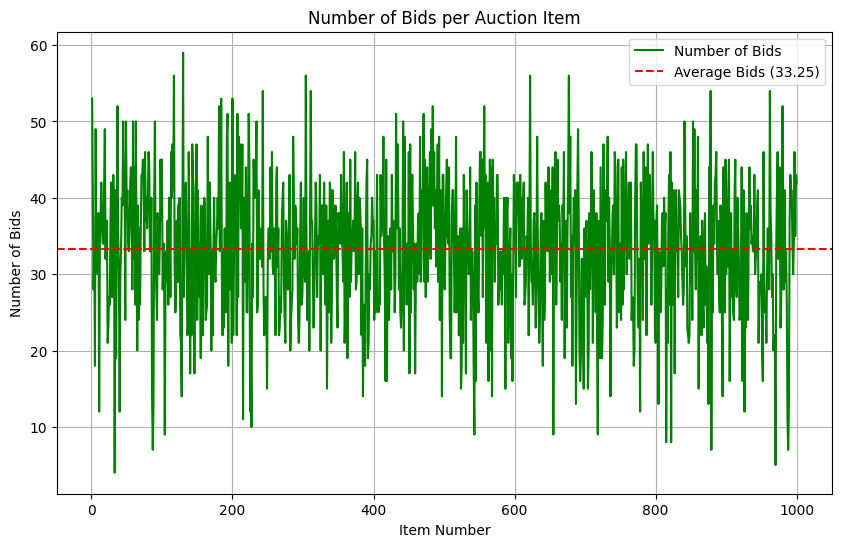

In [1720]:
# Plotting the data
fig, axs = plt.subplots(1, 1, figsize=(10, 6))

# Plot the number of bids per item
axs.plot(aggregated_items['ItemNumber'], aggregated_items['count'], color="green", label='Number of Bids')

# Calculate the average number of bids
average_bids = aggregated_items['count'].mean()

# Plot the average number of bids
axs.axhline(y=average_bids, color='red', linestyle='dashed', label=f'Average Bids ({average_bids:.2f})')

# Adding labels and title
axs.set_xlabel('Item Number')
axs.set_ylabel('Number of Bids')
axs.set_title('Number of Bids per Auction Item')

# Adding grid
axs.grid(True)

# Adding legend
axs.legend()

# Display the plot
plt.show()

<Axes: xlabel='count', ylabel='Count'>

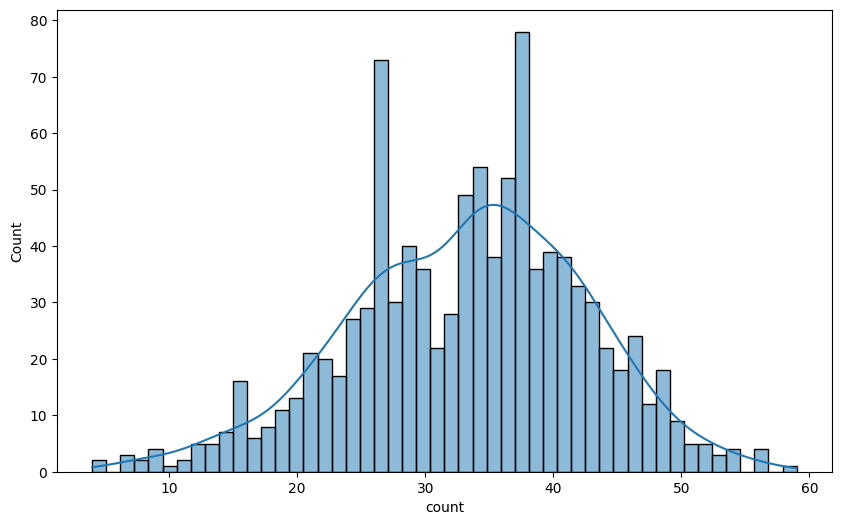

In [1721]:
fig, axs = plt.subplots(1, 1, figsize=(10, 6))
sns.histplot(aggregated_items['count'], bins=50, kde=True, ax=axs)

In [1722]:
time_aggregated = results_df.groupby('ItemTime').size().reset_index(name='count')
time_aggregated

,ItemTime,count
0,2.0,1
1,2.4,3
2,2.8,2
3,2.9,1
4,3.3,1
...,...,...
1151,119.6,197
1152,119.7,202
1153,119.8,182
1154,119.9,199


normalizer: 1000


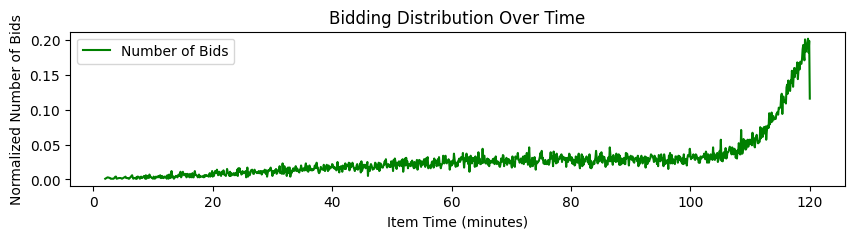

In [1723]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming time_aggregated is already defined and contains 'ItemTime' and 'count' columns

# Calculate the rolling average to smooth the data
time_aggregated['smoothed_count'] = time_aggregated['count'].rolling(window=10, min_periods=1).mean()

# Bidding distribution in the auction
fig, axs = plt.subplots(1, 1, figsize=(10, 2))

print('normalizer:', normalizer)

# Plotting the data as a line plot with smoothed data
axs.plot(time_aggregated['ItemTime'], time_aggregated['count'] / normalizer, color="green", label='Number of Bids')

# Adding labels and title
axs.set_xlabel('Item Time (minutes)')
axs.set_ylabel('Normalized Number of Bids')
axs.set_title('Bidding Distribution Over Time')

# Adding legend
axs.legend()

# Display the plot
plt.show()

In [1724]:
# Overlay ebay auction data with our data
ebay_df = pd.read_csv('ebay.csv')

In [1725]:
ebay_df

,auctionid,bid,bidtime,bidder,bidderrate,openbid,price,item,auction_type
0,1638893549,175.00,2.230949,schadenfreud,0.0,99.00,177.50,Cartier wristwatch,3 day auction
1,1638893549,100.00,2.600116,chuik,0.0,99.00,177.50,Cartier wristwatch,3 day auction
2,1638893549,120.00,2.600810,kiwisstuff,2.0,99.00,177.50,Cartier wristwatch,3 day auction
3,1638893549,150.00,2.601076,kiwisstuff,2.0,99.00,177.50,Cartier wristwatch,3 day auction
4,1638893549,177.50,2.909826,eli.flint@flightsafety.co,4.0,99.00,177.50,Cartier wristwatch,3 day auction
...,...,...,...,...,...,...,...,...,...
10676,8214889177,61.00,6.359155,714ark,15.0,0.01,90.01,Xbox game console,7 day auction
10677,8214889177,76.00,6.359294,rjdorman,1.0,0.01,90.01,Xbox game console,7 day auction
10678,8214889177,90.00,6.428738,baylorjeep,3.0,0.01,90.01,Xbox game console,7 day auction
10679,8214889177,88.00,6.760081,jasonjasonparis,18.0,0.01,90.01,Xbox game console,7 day auction


In [1726]:
ebay_df = ebay_df.dropna()
counts_df = ebay_df.groupby('auction_type').size().reset_index(name='count')
counts_df

,auction_type,count
0,3 day auction,2019
1,5 day auction,1617
2,7 day auction,7018


In [1727]:
auctions_3_days = ebay_df.where(ebay_df['auction_type'].str.contains("3 day auction"))
auctions_3_days = auctions_3_days.dropna()
auctions_3_days_len = len(auctions_3_days.groupby('auctionid'))
print(f"Number of 3-day auctions: {auctions_3_days_len}")

Number of 3-day auctions: 148


In [1728]:
auctions_3_days

,auctionid,bid,bidtime,bidder,bidderrate,openbid,price,item,auction_type
0,1.638894e+09,175.00,2.230949,schadenfreud,0.0,99.0,177.50,Cartier wristwatch,3 day auction
1,1.638894e+09,100.00,2.600116,chuik,0.0,99.0,177.50,Cartier wristwatch,3 day auction
2,1.638894e+09,120.00,2.600810,kiwisstuff,2.0,99.0,177.50,Cartier wristwatch,3 day auction
3,1.638894e+09,150.00,2.601076,kiwisstuff,2.0,99.0,177.50,Cartier wristwatch,3 day auction
4,1.638894e+09,177.50,2.909826,eli.flint@flightsafety.co,4.0,99.0,177.50,Cartier wristwatch,3 day auction
...,...,...,...,...,...,...,...,...,...
8422,8.215611e+09,31.00,2.385764,misschicfashion,13.0,5.0,35.09,Xbox game console,3 day auction
8423,8.215611e+09,32.01,2.385926,misschicfashion,13.0,5.0,35.09,Xbox game console,3 day auction
8424,8.215611e+09,32.00,2.592141,minipc1,104.0,5.0,35.09,Xbox game console,3 day auction
8425,8.215611e+09,35.09,2.973264,bebawl,114.0,5.0,35.09,Xbox game console,3 day auction


In [1729]:
auctions_3_days.loc[:, 'bidtime'] = auctions_3_days['bidtime'].round(1)
auctions_3_days = auctions_3_days.groupby('bidtime').size().reset_index(name='count')

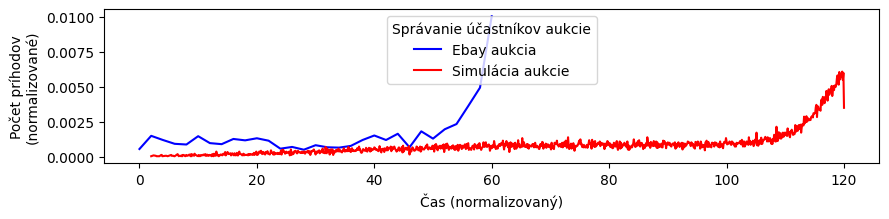

In [1730]:
fig, axs = plt.subplots(1, 1, figsize=(10, 2))
plt.subplots_adjust(hspace=0.75)

# Normalize time and counts for auctions_3_days
auctions_3_days['normalized_bidtime'] = auctions_3_days['bidtime'] * 20   # Normalize time to [0, 1]
auctions_3_days['normalized_count'] = auctions_3_days['count'] /  auctions_3_days['count'].sum() / 20 # Normalize count

# Normalize time and counts for time_aggregated
time_aggregated['normalized_time'] = time_aggregated['ItemTime'] # Normalize time to [0, 1]
time_aggregated['normalized_count'] = time_aggregated['count'] / time_aggregated['count'].sum() # Normalize count

# Plot the normalized data
axs.plot(
    auctions_3_days['normalized_bidtime'],
    auctions_3_days['normalized_count'],
    color='blue',
    label='Ebay aukcia'
)
axs.plot(
    time_aggregated['normalized_time'],
    time_aggregated['normalized_count'],
    color='red',
    label='Simulácia aukcie'
)

axs.set_ylabel('Počet príhodov\n(normalizované)')
axs.set_xlabel('Čas (normalizovaný)')
legend = axs.legend(loc='upper center', bbox_to_anchor=(0.5, 1))
legend.set_title('Správanie účastníkov aukcie')
plt.show()


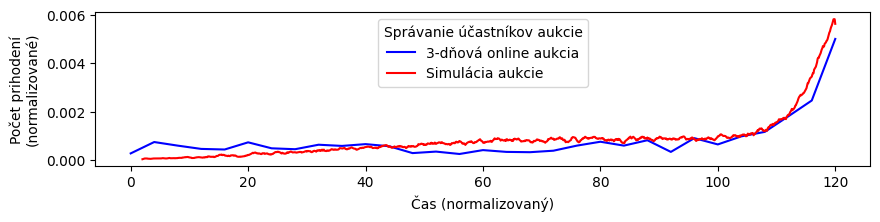

In [1735]:
fig, axs = plt.subplots(1, 1, figsize=(10, 2))
plt.subplots_adjust(hspace=0.75)

axs.plot(auctions_3_days['bidtime'] * 40, auctions_3_days['count'] / auctions_3_days['count'].sum() / 40, color="blue", label='3-dňová online aukcia')
axs.plot(time_aggregated['ItemTime'], time_aggregated['smoothed_count'] / time_aggregated['smoothed_count'].sum(), color="red", label='Simulácia aukcie')

axs.set_ylabel('Počet prihodení\n(normalizované)')
axs.set_xlabel('Čas (normalizovaný)')
legend = axs.legend(loc='upper center', bbox_to_anchor=(0.5, 1))
legend.set_title('Správanie účastníkov aukcie')
plt.show()